# Heart Attack Prediction

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
## Import dataset
df = pd.read_csv('heart.csv')

print('Info:\n', df.head())

print('\nData Shape: \n', df.shape)

print('Description:\n', df.describe())

print('\n Sum of label events: \n', df['output'].value_counts())

print('We have an balanced dataset')

Info:
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

Data Shape: 
 (303, 14)
Description:
               age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.

In [5]:
#Check for null values
print('Null values: \n', df.isna().sum())

# list of categorical values
cat_list = ['sex','cp','fbs', 'restecg', 'exng','slp','caa','thall']

# check unique values of features
print('\n', df[cat_list].nunique())

Null values: 
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

 sex        2
cp         4
fbs        2
restecg    3
exng       2
slp        3
caa        5
thall      4
dtype: int64


In [6]:
# Change type of categorical variables to 'category'

print('Before:\n',df.dtypes)

df[cat_list] = df[cat_list].astype('category')

print('After:\n',df.dtypes)

Before:
 age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
After:
 age            int64
sex         category
cp          category
trtbps         int64
chol           int64
fbs         category
restecg     category
thalachh       int64
exng        category
oldpeak      float64
slp         category
caa         category
thall       category
output         int64
dtype: object


In [7]:
#isolate the target - y

y = df.output
df = df.drop(['output'], axis = 1)

print(df.shape,y.shape)

(303, 13) (303,)


Description of the numerical features
              age      trtbps        chol    thalachh     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000


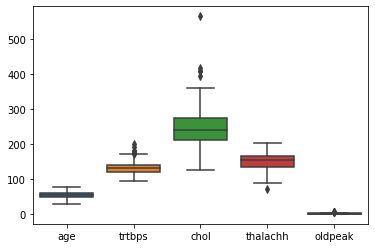

As we can see, the range of values between features are very different, so we should standardize them.


In [8]:
# Check description of numerical values
df_num = df[df.columns[~df.columns.isin(cat_list)]]
print('Description of the numerical features')
print(df_num.describe())

ax = sns.boxplot(data=df_num)
plt.show()

print('As we can see, the range of values between features are very different, so we should standardize them.')

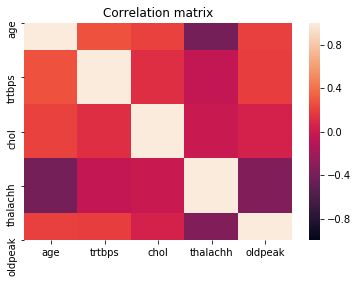

As we can see from the corr matrx above, theres is no evident correlation between numerical features.       In this case we can not select features to drop. 


In [9]:
# But first let's see if it exists any correlation between them
corr_mtrx = df_num.corr()

sns.heatmap(corr_mtrx, vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

print("As we can see from the corr matrx above, theres is no evident correlation between numerical features. \
      In this case we can not select features to drop. ")

In [10]:
#We can now standardize our features

#list of columns that are numerical

num_list = df.select_dtypes(exclude=['category']).columns
print(df[num_list])

df[num_list] = StandardScaler().fit_transform(df[num_list])
print(df)

     age  trtbps  chol  thalachh  oldpeak
0     63     145   233       150      2.3
1     37     130   250       187      3.5
2     41     130   204       172      1.4
3     56     120   236       178      0.8
4     57     120   354       163      0.6
..   ...     ...   ...       ...      ...
298   57     140   241       123      0.2
299   45     110   264       132      1.2
300   68     144   193       141      3.4
301   57     130   131       115      1.2
302   57     130   236       174      0.0

[303 rows x 5 columns]
          age sex cp    trtbps      chol fbs restecg  thalachh exng   oldpeak  \
0    0.952197   1  3  0.763956 -0.256334   1       0  0.015443    0  1.087338   
1   -1.915313   1  2 -0.092738  0.072199   0       1  1.633471    0  2.122573   
2   -1.474158   0  1 -0.092738 -0.816773   0       0  0.977514    0  0.310912   
3    0.180175   1  1 -0.663867 -0.198357   0       1  1.239897    0 -0.206705   
4    0.290464   0  0 -0.663867  2.082050   0       1  0.583939    1

## We need to check for some cat features if they have some degree of impact in the result 

In [11]:
## EDA Analysis

#build a dummy dtst just for visualization
df_extra = pd.concat([df,y], axis = 1)
print(df_extra)

          age sex cp    trtbps      chol fbs restecg  thalachh exng   oldpeak  \
0    0.952197   1  3  0.763956 -0.256334   1       0  0.015443    0  1.087338   
1   -1.915313   1  2 -0.092738  0.072199   0       1  1.633471    0  2.122573   
2   -1.474158   0  1 -0.092738 -0.816773   0       0  0.977514    0  0.310912   
3    0.180175   1  1 -0.663867 -0.198357   0       1  1.239897    0 -0.206705   
4    0.290464   0  0 -0.663867  2.082050   0       1  0.583939    1 -0.379244   
..        ...  .. ..       ...       ...  ..     ...       ...  ...       ...   
298  0.290464   0  0  0.478391 -0.101730   0       1 -1.165281    1 -0.724323   
299 -1.033002   1  3 -1.234996  0.342756   0       1 -0.771706    0  0.138373   
300  1.503641   1  0  0.706843 -1.029353   1       1 -0.378132    0  2.036303   
301  0.290464   1  0 -0.092738 -2.227533   0       1 -1.515125    1  0.138373   
302  0.290464   0  1 -0.092738 -0.198357   0       0  1.064975    0 -0.896862   

    slp caa thall  output  

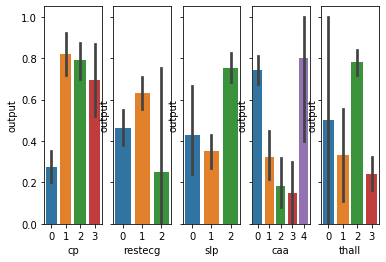

Observing the above plot we can not clearly see a correlation between the number of cases and the order of the categorical features. Therefore we will convert this categrical variables into one-hot encoding.


In [12]:
fig, axs = plt.subplots(1, 5, sharey=True)
sns.barplot(ax=axs[0], x = 'cp', y='output', data=df_extra)
sns.barplot(ax=axs[1], x = 'restecg', y='output', data=df_extra)
sns.barplot(ax=axs[2], x = 'slp', y='output', data=df_extra)
sns.barplot(ax=axs[3], x = 'caa', y='output', data=df_extra)
sns.barplot(ax=axs[4], x = 'thall', y='output', data=df_extra)
plt.show()

print('Observing the above plot we can not clearly see a correlation between the number of cases and the order of \
the categorical features. Therefore we will convert this categrical variables into one-hot encoding.')

In [13]:
df = pd.get_dummies(df, columns = cat_list, drop_first=True)

In [14]:
print(df.head())

        age    trtbps      chol  thalachh   oldpeak  sex_1  cp_1  cp_2  cp_3  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338      1     0     0     1   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573      1     0     1     0   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912      0     1     0     0   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705      1     1     0     0   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244      0     0     0     0   

   fbs_1  ...  exng_1  slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  thall_1  \
0      1  ...       0      0      0      0      0      0      0        1   
1      0  ...       0      0      0      0      0      0      0        0   
2      0  ...       0      0      1      0      0      0      0        0   
3      0  ...       0      0      1      0      0      0      0        0   
4      0  ...       1      0      1      0      0      0      0        0   

   thall_2  thall_3  
0        0        0  
1        1        

In [15]:
#split data into train and test
X = np.array(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size= 0.33, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(203, 22) (203,)
(100, 22) (100,)


### *Note: article about feature selection: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

## Adjustment of hyperparameters with Cross Validation

In [54]:
# We are using classification models: LogReg, SVM and DecisionTree
# For each model we have wide range of hyperparameters. Let's define them

param_logreg = {'penalty': ('l1','l2'), 'C' : [0.05, 0.15, 0.25, 0.35, 0.45,0.55, 0.65, 0.75,0.85, 1] }

param_svm = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10,]}

param_dt = {'max_depth': [3, 4, 5, 6, 8], 'min_samples_leaf':[0.04, 0.06, 0.08],
           'max_features': [0.2, 0.4, 0.6, 0.8]}


In [49]:
#Now let's perform a gridsearch cv for each model and get best parameters and score

logreg = LogisticRegression(solver='liblinear')

grid_logreg = GridSearchCV(estimator = logreg, param_grid = param_logreg, scoring='accuracy', cv=5)
grid_logreg.fit(X_train, y_train)
best_logreg = grid_logreg.best_params_
print('Best Hyperparam for LogReg: \n', best_logreg)
best_logreg_score = grid_logreg.best_score_
print('With accuracy of: \n', best_logreg_score)

#extract the model w/ best hyper
best_model_logreg = grid_logreg.best_estimator_
print('Test set accuracy is: \n', best_model_logreg.score(X_test, y_test))

y_pred = grid_logreg.predict(X_test)
c_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(c_matrix)

Best Hyperparam for LogReg: 
 {'C': 0.15, 'penalty': 'l2'}
With accuracy of: 
 0.8571428571428571
Test set accuracy is: 
 0.8
Predicted   0   1
Actual           
0          36  10
1          10  44


In [50]:
svm = SVC(gamma='auto')
grid_svm = GridSearchCV(estimator = svm, param_grid = param_svm, cv=5, scoring='recall')
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_params_
print('Best Hyperparam for SVM: \n', best_svm)
best_svm_score = grid_svm.best_score_
print('With accuracy of: \n', best_svm_score)

#extract the model w/ best hyper
best_model_svm = grid_svm.best_estimator_
print('Test set accuracy is: \n', best_model_svm.score(X_test, y_test))
y_pred_svm = grid_svm.predict(X_test)
c_matrix_svm = pd.crosstab(y_test, y_pred_svm, rownames=['Actual'], colnames=['Predicted'])
print(c_matrix_svm)

Best Hyperparam for SVM: 
 {'C': 0.1, 'kernel': 'rbf'}
With accuracy of: 
 0.8738195837146361
Test set accuracy is: 
 0.8
Predicted   0   1
Actual           
0          33  13
1           7  47


In [56]:
dt = DecisionTreeClassifier(random_state=1)
grid_dt = GridSearchCV(estimator = dt, param_grid = param_dt, cv=5, scoring='recall')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_params_
print('Best Hyperparam for Decision Tree: \n', best_dt)
best_dt_score = grid_dt.best_score_
print('With accuracy of: \n', best_dt_score)

#extract the model w/ best hyper
best_model_dt = grid_dt.best_estimator_
print('Test set accuracy is: \n', best_model_dt.score(X_test, y_test))
y_pred_dt = grid_dt.predict(X_test)
c_matrix_dt = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])
print(c_matrix_dt)

Best Hyperparam for Decision Tree: 
 {'max_depth': 3, 'max_features': 0.4, 'min_samples_leaf': 0.08}
With accuracy of: 
 0.8278393270897019
Test set accuracy is: 
 0.71
Predicted   0   1
Actual           
0          24  22
1           7  47


In [68]:
## Random Forest Classifier

rf = RandomForestClassifier(random_state=1)

params_rf = {'n_estimators': [100,200,300], 'max_depth': [2,3,4,6,8],
            'min_samples_leaf':[0.02, 0.04, 0.06, 0.08], 'max_features': ['log2']}

grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring='accuracy', cv=5)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_params_
print('Best hyperparameters: \n', best_rf)
best_rf_score = grid_rf.best_score_
print('With accuracy of: \n', best_rf_score)

y_pred_rf = grid_rf.predict(X_test)
c_matrix_rf = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
print(c_matrix_rf)

Best hyperparameters: 
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.04, 'n_estimators': 100}
With accuracy of: 
 0.8423645320197044
Predicted   0   1
Actual           
0          33  13
1           9  45


In [123]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print('Precision: ',precision)
print('Recall: ', recall)
print('F1 score: ',f1)

Precision:  0.8484848484848485
Recall:  0.8484848484848485
F1 score:  0.8484848484848486
